In [115]:
import numpy as np
import keras
import matplotlib.pyplot as plt

from keras.utils import to_categorical #for one-hot encoding

from keras.models import Sequential #base model
from keras.layers import InputLayer #different layers
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import ReLU
from keras.layers import Softmax

In [116]:
#Import pre-processed data (see other notebook)
data = np.load('/content/preprocessed_images_and_labels.npz')
images = data["images"]
labels = data["labels"]
train_inds = data["train_inds"]
test_inds = data["test_inds"]

In [117]:
#Create training and testing sets
train_images = images[train_inds]
train_labels = labels[train_inds]
train_labels = to_categorical(train_labels) #one hot encode

test_images = images[test_inds]
test_labels = labels[test_inds]
test_labels = to_categorical(test_labels)
test_labels = np.delete(test_labels, 1, axis = 1) #make sure there are only two options

In [118]:
#trained on foreground red, tested on background red

num_conv = 8 #number of different convolutional layers to try
num_epochs = 3 #number of epochs to train

train_acc = np.zeros((num_conv,num_epochs))
test_acc = np.zeros((num_conv,num_epochs))

for i in range(num_conv):
  red_net = Sequential()
  red_net.add(InputLayer(input_shape = (32,32,3)))
  red_net.add(Conv2D(i+1, (8,8)))
  red_net.add(MaxPooling2D())
  red_net.add(Flatten())
  red_net.add(Dense(2))
  red_net.add(ReLU())
  red_net.add(Softmax())

  red_net.compile(loss = "binary_crossentropy", optimizer = "adam", metrics=['accuracy'])
  history = red_net.fit(train_images, train_labels, epochs = num_epochs, validation_data=(test_images, test_labels))
  train_acc[i,:] = history.history["accuracy"]
  test_acc[i,:] = history.history["val_accuracy"]

Epoch 1/3
14/14 [==============================] - 1s 48ms/step - loss: 20.7151 - accuracy: 0.5800 - val_loss: 9.4581 - val_accuracy: 0.5945
Epoch 2/3
14/14 [==============================] - 0s 36ms/step - loss: 3.8376 - accuracy: 0.7613 - val_loss: 0.7870 - val_accuracy: 0.8942
Epoch 3/3
14/14 [==============================] - 0s 28ms/step - loss: 0.8398 - accuracy: 0.8544 - val_loss: 0.6923 - val_accuracy: 0.9018
Epoch 1/3
14/14 [==============================] - 1s 51ms/step - loss: 2.6137 - accuracy: 0.8544 - val_loss: 0.8875 - val_accuracy: 0.9018
Epoch 2/3
14/14 [==============================] - 1s 48ms/step - loss: 0.6931 - accuracy: 0.8544 - val_loss: 0.8573 - val_accuracy: 0.9018
Epoch 3/3
14/14 [==============================] - 1s 50ms/step - loss: 0.6931 - accuracy: 0.8544 - val_loss: 0.8499 - val_accuracy: 0.9043
Epoch 1/3
14/14 [==============================] - 2s 74ms/step - loss: 1.7811 - accuracy: 0.8520 - val_loss: 0.6931 - val_accuracy: 0.9018
Epoch 2/3
14/14 [==

In [119]:
train_acc_means = np.mean(train_acc, axis =1) #average train and test accuracies over all epochs
test_acc_means = np.mean(test_acc, axis =1)

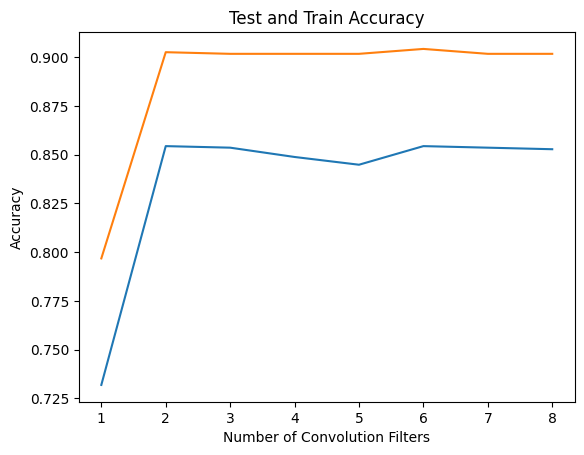

In [120]:
plt.plot(range(1, num_conv+1), train_acc_means) #blue line, avg train accuracy
plt.plot(range(1, num_conv+1), test_acc_means) #orange line, avg test accuracy
plt.xlabel('Number of Convolution Filters')
plt.ylabel('Accuracy')
plt.title('Test and Train Accuracy')
plt.show()

In [121]:
#DO THE SAME THING, BUT SWITCH TRAIN AND TEST SETS
#trained on background red, tested on foreground red

num_conv = 8 #number of different convolutional layers to try
num_epochs = 3 #number of epochs to train

rev_train_acc = np.zeros((num_conv,num_epochs))
rev_test_acc = np.zeros((num_conv,num_epochs))

for i in range(num_conv):
  rev_red_net = Sequential()
  rev_red_net.add(InputLayer(input_shape = (32,32,3)))
  rev_red_net.add(Conv2D(i+1, (8,8)))
  rev_red_net.add(MaxPooling2D())
  rev_red_net.add(Flatten())
  rev_red_net.add(Dense(2))
  rev_red_net.add(ReLU())
  rev_red_net.add(Softmax())

  rev_red_net.compile(loss = "binary_crossentropy", optimizer = "adam", metrics=['accuracy'])
  history = rev_red_net.fit(test_images, test_labels, epochs = num_epochs, validation_data=(train_images, train_labels))
  rev_train_acc[i,:] = history.history["accuracy"]
  rev_test_acc[i,:] = history.history["val_accuracy"]

Epoch 1/3
13/13 [==============================] - 1s 48ms/step - loss: 5.5108 - accuracy: 0.8262 - val_loss: 1.0064 - val_accuracy: 0.8473
Epoch 2/3
13/13 [==============================] - 0s 28ms/step - loss: 0.8257 - accuracy: 0.8992 - val_loss: 0.7364 - val_accuracy: 0.8496
Epoch 3/3
13/13 [==============================] - 0s 35ms/step - loss: 0.7094 - accuracy: 0.8992 - val_loss: 0.7013 - val_accuracy: 0.8520
Epoch 1/3
13/13 [==============================] - 1s 54ms/step - loss: 54.7720 - accuracy: 0.7204 - val_loss: 0.6931 - val_accuracy: 0.8544
Epoch 2/3
13/13 [==============================] - 0s 38ms/step - loss: 0.6931 - accuracy: 0.9018 - val_loss: 0.6931 - val_accuracy: 0.8544
Epoch 3/3
13/13 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.9018 - val_loss: 0.6931 - val_accuracy: 0.8544
Epoch 1/3
13/13 [==============================] - 1s 52ms/step - loss: 1.1943 - accuracy: 0.8866 - val_loss: 0.6923 - val_accuracy: 0.8568
Epoch 2/3
13/13 [==

In [122]:
rev_train_acc_means = np.mean(rev_train_acc, axis =1) #average train and test accuracies over all epochs
rev_test_acc_means = np.mean(rev_test_acc, axis =1)

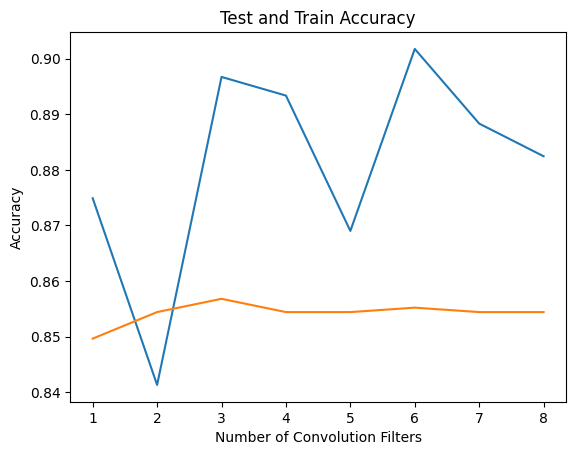

In [123]:
plt.plot(range(1, num_conv+1), rev_train_acc_means) #blue line, avg train accuracy
plt.plot(range(1, num_conv+1), rev_test_acc_means) #orange line, avg test accuracy
plt.xlabel('Number of Convolution Filters')
plt.ylabel('Accuracy')
plt.title('Test and Train Accuracy')
plt.show()